In [2]:
# import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras import layers
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras.optimizers import SGD


import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#Loading Data
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
#Checking data set type and shape
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))
#Dataset shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


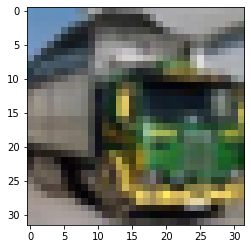

In [5]:
# Displaying image
index = 14
img = plt.imshow(x_train[index])

In [6]:
# x_train and x_test are images, their corresponding y values are image labels
# Getting the image classifications from what we know as every image label is a number, example Frog is label 6
classifications = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print('Label is :',classifications[y_train[index][0]]) #changing the Y-train column values we can go to images and print its label
# We can change the index and check if the x_train images and its Y-train label is correct before we can move on

Label is : truck


In [7]:
# Now we convert the labels into a set of 10 values to serve as an input to the CNN using to_categorical() method
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
#Printing labels
print(y_train_one_hot)
print(y_train_one_hot[index])
# we can observe that the label at index 0 i.e horse(or whatever the label value is) is now converted to a binary matrix 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
# Now we can normalize pixels to be values between 0 and 1
x_train = x_train/255
x_test = x_test/255
x_train[index]


array([[[0.39215686, 0.57254902, 0.75294118],
        [0.38431373, 0.56470588, 0.74117647],
        [0.38823529, 0.56470588, 0.74117647],
        ...,
        [0.64705882, 0.64705882, 0.64705882],
        [0.63921569, 0.63921569, 0.63921569],
        [0.64705882, 0.64705882, 0.64705882]],

       [[0.39607843, 0.56862745, 0.7372549 ],
        [0.39215686, 0.56078431, 0.72941176],
        [0.39215686, 0.56078431, 0.72941176],
        ...,
        [0.64313725, 0.63137255, 0.62352941],
        [0.63921569, 0.63529412, 0.62352941],
        [0.62352941, 0.63137255, 0.61568627]],

       [[0.41176471, 0.57647059, 0.74117647],
        [0.40784314, 0.56862745, 0.72941176],
        [0.40784314, 0.56862745, 0.73333333],
        ...,
        [0.61176471, 0.58823529, 0.57647059],
        [0.53333333, 0.52156863, 0.50588235],
        [0.44705882, 0.45882353, 0.43529412]],

       ...,

       [[0.65098039, 0.61176471, 0.58823529],
        [0.65098039, 0.61176471, 0.59215686],
        [0.65882353, 0

In [10]:
# Create models architecture
model = Sequential()

# Adding 1st layer
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#Adding average pooling layer
model.add(AveragePooling2D(pool_size=(2,2)) )

#Adding a second Convolution layer
model.add(Conv2D(32, (5,5), activation='relu') )

#Adding a second pooling layer
model.add(AveragePooling2D(pool_size=(2,2)))

#Adding a flattening layer
model.add(Flatten())

# Now we add a layer of 1000 neurons
model.add(Dense(1000, activation='relu'))

#Adding a drop out layer at 50% drop rate
model.add(Dropout(0.5))

# Now we add a layer of 500 neurons
model.add(Dense(500, activation='relu'))

#Adding a drop out layer at 50% drop rate
model.add(Dropout(0.5))

# Adding another layer of 250 neurons
model.add(Dense(250, activation='relu'))

# Adding another layer of 10 neurons
model.add(Dense(10, activation='softmax'))

In [11]:
#Complie the model
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [12]:
#Training the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=15, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 41s 1ms/step - loss: 1.8044 - accuracy: 0.3240 - val_loss: 1.5677 - val_accuracy: 0.4279
Epoch 2/15
40000/40000 [==============================] - 39s 984us/step - loss: 1.4798 - accuracy: 0.4568 - val_loss: 1.3540 - val_accuracy: 0.5118
Epoch 3/15
40000/40000 [==============================] - 38s 942us/step - loss: 1.3344 - accuracy: 0.5176 - val_loss: 1.3049 - val_accuracy: 0.5378
Epoch 4/15
40000/40000 [==============================] - 38s 957us/step - loss: 1.2327 - accuracy: 0.5571 - val_loss: 1.1872 - val_accuracy: 0.5788
Epoch 5/15
40000/40000 [==============================] - 38s 947us/step - loss: 1.1500 - accuracy: 0.5897 - val_loss: 1.1097 - val_accuracy: 0.6022

In [23]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 3s 329us/step


0.6863999962806702

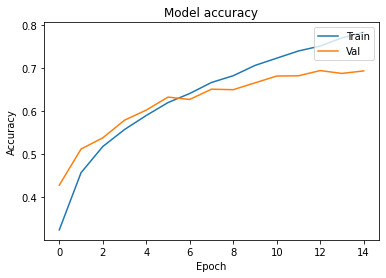

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')

In [18]:
model.save('final1.h5')

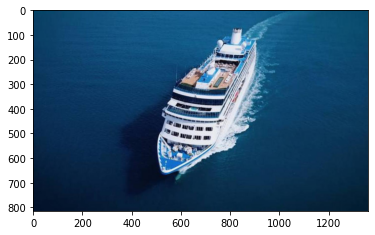

In [25]:
#
import matplotlib.image as mpimg
image_truck = mpimg.imread("ship_pred.jpeg")
plt.imshow(image_truck)
plt.show()

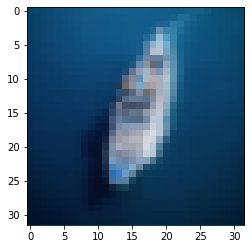

In [26]:
#Resizing the image
from skimage.transform import resize
resized_truck = resize(image_truck, (32,32,3))
plt.imshow(resized_truck)

In [27]:
#Predicting the image
pred = model.predict(np.array([resized_truck]))
pred

array([[2.6281378e-01, 9.2186872e-04, 1.9556941e-02, 4.8682746e-03,
        2.8967718e-03, 8.5742038e-04, 6.9314084e-04, 5.0419662e-04,
        7.0556968e-01, 1.3180060e-03]], dtype=float32)

In [28]:
#Sorting predictions in order in ascending order
list_index=[0,1,2,3,4,5,6,7,8,9]
x = pred

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

[8, 0, 2, 3, 4, 9, 1, 5, 6, 7]


In [29]:
#Printing top 3 predictions
for i in range(3):
    print(classifications[list_index[i]], ':', round(pred[0][list_index[i]]*100, 2), '%')

ship : 70.56 %
airplane : 26.28 %
bird : 1.96 %
